In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ratings = pd.read_csv("ratings.csv")

In [ ]:
ratings.rename(columns={"userId": "user", "movieId": "movie"}, inplace=True)

In [ ]:
test_data = pd.DataFrame(columns=["user", "movie", "rating", "timestamp"])
train_data = pd.DataFrame(columns=["user", "movie", "rating", "timestamp"])

In [ ]:
movie_index_map = {movie:i+1 for i, movie in enumerate(ratings["movie"].unique())}
user_index_map = {user:i+1 for i, user in enumerate(ratings["user"].unique())}

In [ ]:
ratings["user_index"] = ratings.apply(lambda x: user_index_map[x["user"]], axis=1)
ratings["movie_index"] = ratings.apply(lambda x: movie_index_map[x["movie"]], axis=1)

In [ ]:
# test train split
for user in ratings["user"].unique():
  data_user = ratings[ratings["user"] == user]
  user_train, user_test = train_test_split(data_user, test_size=0.2)
  train_data = pd.concat((train_data, user_train))
  test_data = pd.concat((test_data, user_test))
  del data_user
  del user_train
  del user_test
test_data.to_csv("test_20.csv")
train_data.to_csv("train_20.csv")

In [ ]:
user_review_count = ratings.groupby("userId").count()["rating"]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
user_review_count.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64

In [ ]:
movie_review_count = ratings.groupby("movieId").count()["rating"]
movie_review_count.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: rating, dtype: float64

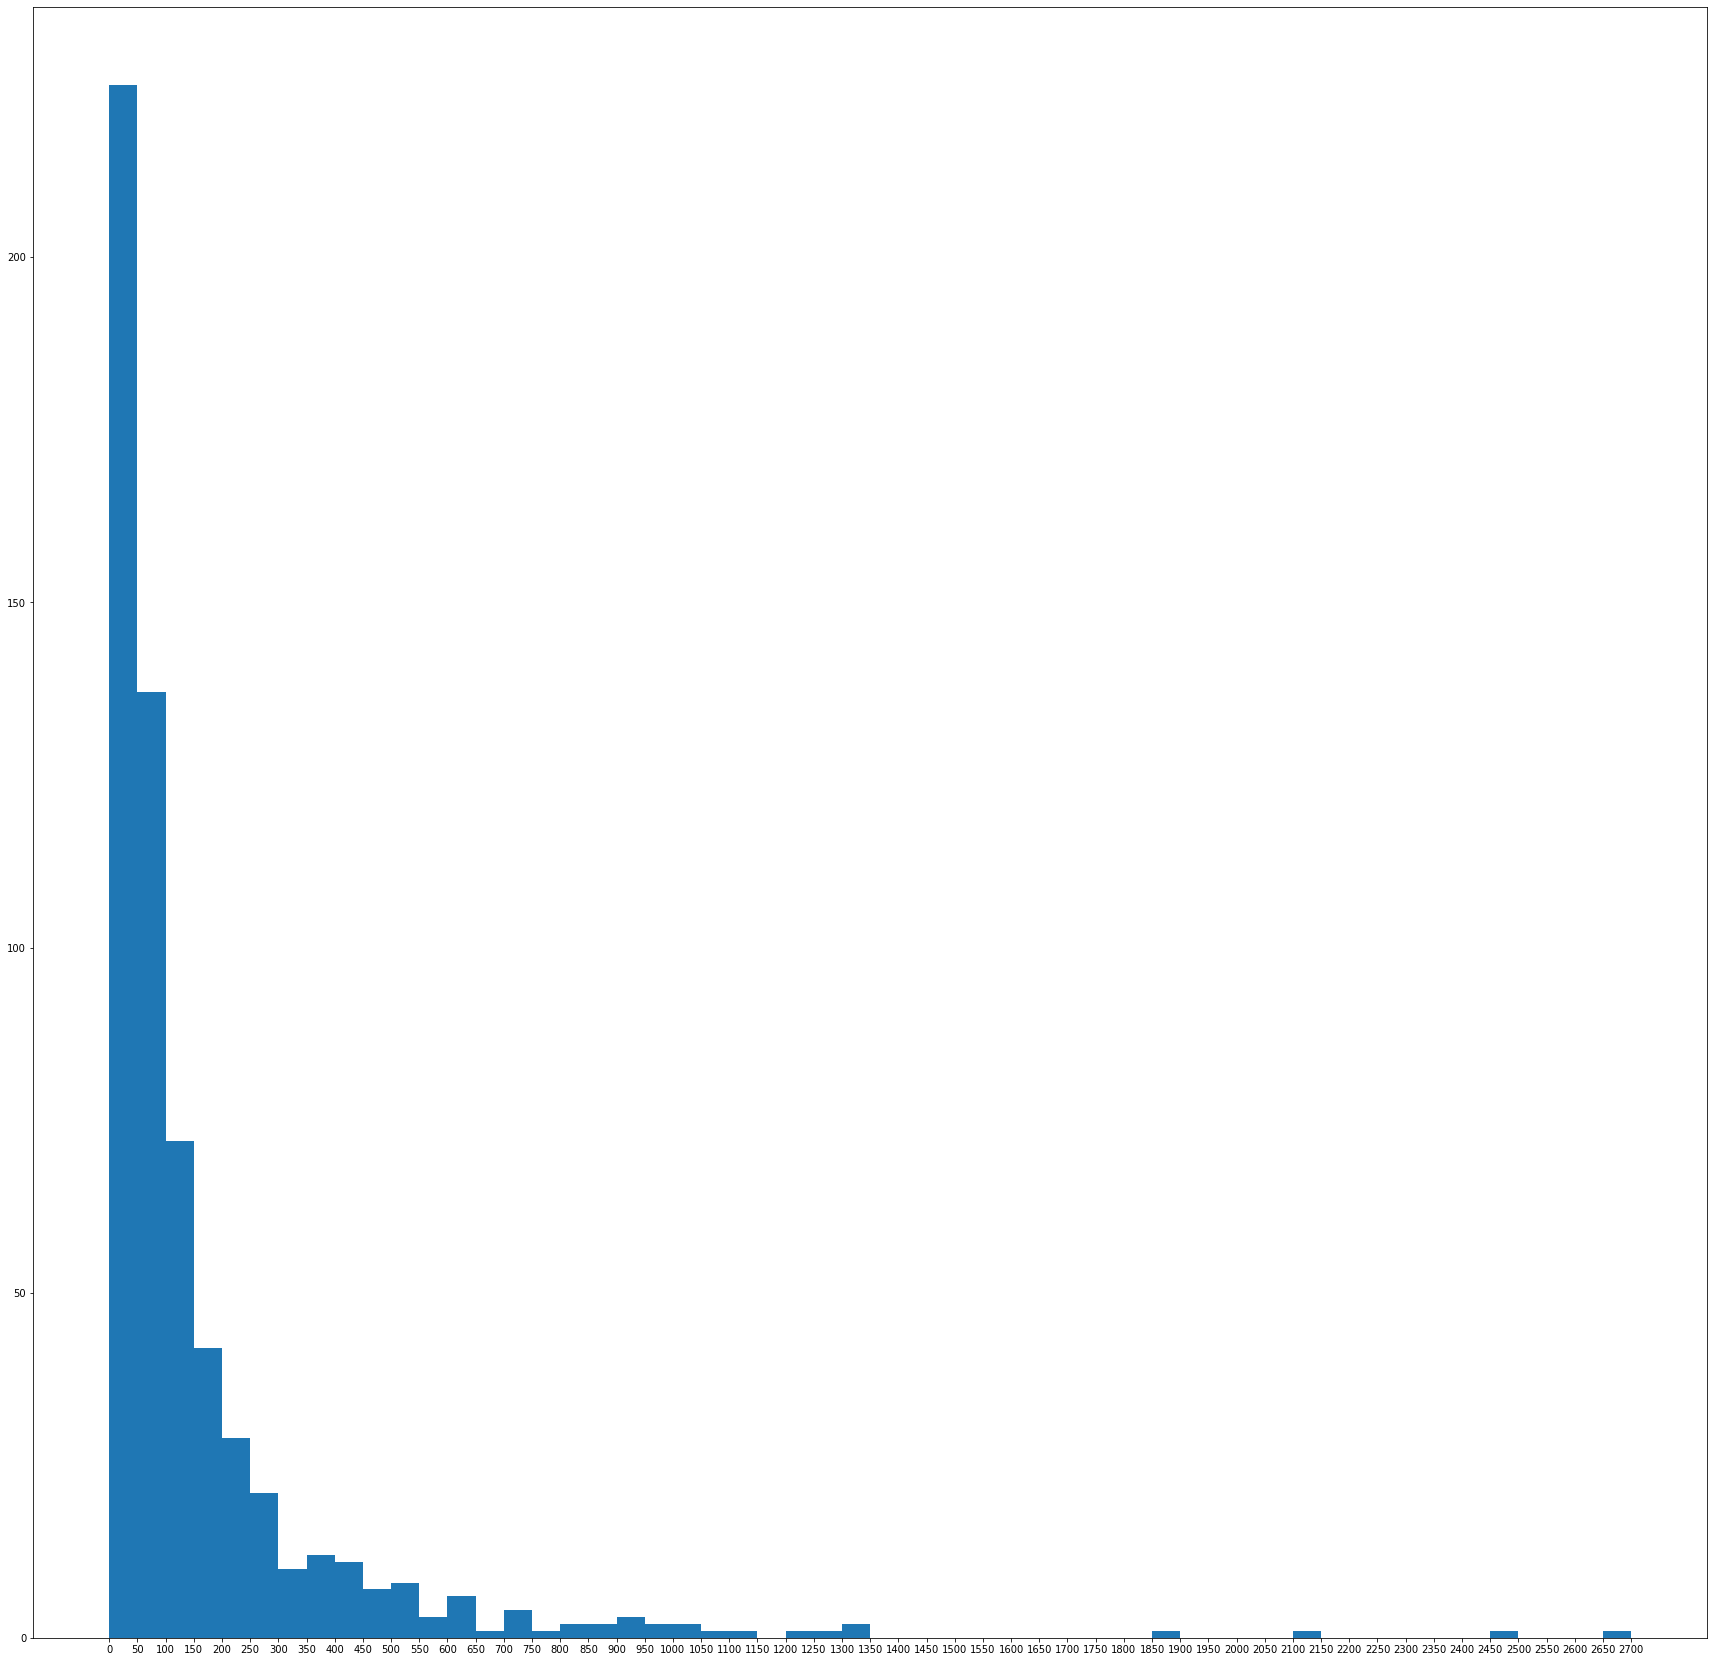

In [ ]:

plt.figure(figsize=(30, 30))
bin_width = max(10, np.round(user_review_count.max() / 25 / 20) * 10)
bins = np.arange(0, user_review_count.max() + bin_width, bin_width)
plt.hist(user_review_count, bins=bins)
plt.xticks(bins)
plt.show()

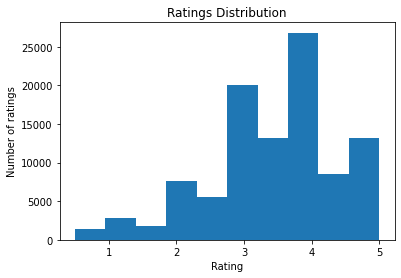

In [ ]:
plt.hist(ratings["rating"])
plt.xlabel("Rating")
plt.ylabel("Number of ratings")
plt.title("Ratings Distribution")
plt.show()

In [ ]:
movies = pd.read_csv("movies.csv")

In [ ]:
movies["genres"] = movies["genres"].apply(lambda x: x.split("|"))

In [ ]:
ratings = pd.merge(ratings, movies, on=["movieId"])

In [ ]:
genre_distribution = pd.DataFrame()
genre_distribution["genre"] = [genre for genre_list in movies["genres"] for genre in genre_list ]

In [ ]:
genre_distribution["count"] = 1


In [ ]:
genre_distribution = genre_distribution.groupby("genre").count().reset_index()

In [ ]:
genre_distribution = genre_distribution[genre_distribution["genre"] != "(no genres listed)"]

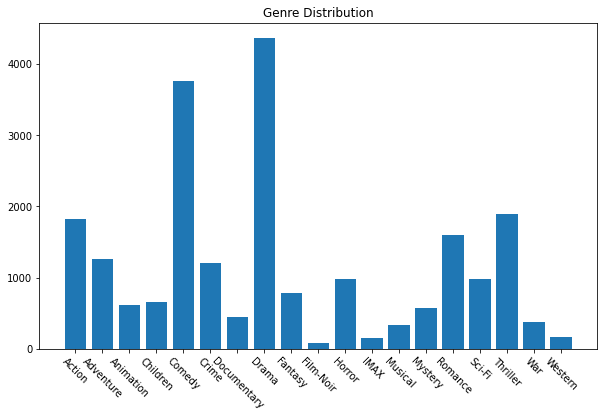

In [ ]:
x_cords = [i for i in range(len(genre_distribution))]
plt.figure(figsize=(10,6))
plt.bar(x_cords, genre_distribution["count"])
plt.xticks(x_cords, genre_distribution["genre"], rotation=-45)
plt.title("Genre Distribution")
plt.show()